<a href="https://colab.research.google.com/github/Rodrigo-O-Santos/Portfolio/blob/master/Airbnb_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. O detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O Rio de Janeiro é a cidade que mais recebe turista no Brasil, possui aproximadamente 6.6 milhões de habitantes (dados de 2015) e recebeu em 2016, aproxidamente, 6.5 milhoes de turistas.

Os turistas são atraídos por inúmeras atrações: Carnaval, tradicional festa de *Réveillon* em Copacabana, estátua do Cristo Redentor, museus históricos e, entre tantas outras, um clima sempre quente aliado às belas praias.

Ao viajar para o Rio de Janeiro, uma das coisas mais importantes é a localização da hospedagem para que fique o mais próximo possível das atrações turísticas e, ao mesmo tempo, em um local seguro.

<center><img src="https://bit.ly/2Bp1u3r", width = "300"></center>

**Neste *notebook*, iremos analisar os dados do Airbnb, referente à cidade do Rio de Janeiro, e verificar o preço médio da diária de um imóvel por região ou bairro, buscando entender se há correlação entre áreas nobres e preços altos.**



## Obtenção dos dados

Todos os dados obtidos para esta análise foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise, foi extraído um arquivo do site citado:
* `listings.csv` - *Summary information and metrics for listings in Hong Kong (good for visualisations).*

In [89]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [90]:
# Importando o arquivo listings.csv para um dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Rodrigo-O-Santos/Arquivos/master/listings%20(1).csv")

## Análise inicial dos dados

Analisando as 5 primeiras entradas do nosso dataset, podemos verificar quais são as variáveis existentes:

**Dicionário das variáveis**

* `id` - número gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número que identifica o proprietário do imóvel
* `host_name` - nome do proprietário
* `neighbourhood_group` - coluna não possui nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de imóvel ofertado (quarto, apt inteiro, casa)
*	`price` - preço cobrado pela diária
*	`minimum_nights` - mínimo de noites necessárias para alugar o imóvel
*	`number_of_reviews` - números de análises que a propriedade possui
*	`last_review` - data da última análise feita
*	`reviews_per_month` - análises recebidas por mês
*	`calculated_host_listings_count` - número de imóveis do mesmo proprietário
*	`availability_365` - número de dias disponíveis (considerando 365 dias)

Nossa base de dados possui 35793 linhas e 16 colunas de dados.



In [91]:
# Verificando as primeiras 5 entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


In [92]:
# Verificando o número de entradas e de variáveis
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 35793
Variáveis:	 16



## Analisando os bairros

Podemos verificar que existem 155 bairros oferecendo algum tipo de hospedagem pelo Airbnb que variam entre:

*   Casa/apt completo
*   Quarto privado
*   Quarto compartilhado
*   Quarto de hotel


In [93]:
# Mostrar os bairros com imóveis para alugar no Airbnb
df.neighbourhood.unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo',
       'Santa Teresa', 'Centro', 'Gávea', 'Leblon', 'Campo Grande',
       'Laranjeiras', 'Humaitá', 'Botafogo', 'Santo Cristo', 'Glória',
       'São Conrado', 'Itanhangá', 'São Cristóvão', 'Lagoa', 'Maracanã',
       'Tijuca', 'São Francisco Xavier', 'Catete', 'Jacarepaguá',
       'Vidigal', 'Marechal Hermes', 'Jardim Botânico',
       'Recreio dos Bandeirantes', 'Senador Camará', 'Irajá',
       'Vargem Grande', 'Leme', 'Vila da Penha', 'Anil', 'Vargem Pequena',
       'Estácio', 'Praça Seca', 'Grajaú', 'Cosme Velho', 'Gardênia Azul',
       'Taquara', 'Bangu', 'Urca', 'Joá', 'Alto da Boa Vista',
       'Penha Circular', 'Jardim Sulacap', 'Praça da Bandeira',
       'Encantado', 'Rio Comprido', 'Lins de Vasconcelos', 'Cosmos',
       'Santíssimo', 'Gamboa', 'Bonsucesso', 'Camorim', 'Piedade',
       'Olaria', 'Vila Valqueire', 'Cidade de Deus', 'Riachuelo',
       'Barra de Guaratiba', 'Padre Miguel', 'Méier', 'Andaraí'

In [94]:
# Verificando quantos bairros existem imóveis para alugar
df.neighbourhood.describe()

count          35793
unique           155
top       Copacabana
freq            9342
Name: neighbourhood, dtype: object

In [95]:
# Mostrando os tipos de imóveis à disposição
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [96]:
# Verificando os tipos de dados presente no dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Dados ausentes

Podemos verificar que temos alguns dados ausentes em nosso dataset:

- **neighbourhood_group** - possui 100% de dados faltantes;
- **reviews_per_month** e **last_review** - possui 41,6% de dados faltantes;
- **name** e **host_name** - possuem menos de 1% de dados faltantes.

Nenhuma destas colunas irá impactar na minha análise exploratória, visto que minha análise está focada em buscar o preço médio por bairro, com foco em verificar a correlação entre bairros nobres e alto valor da diária.

Sendo assim, excluirei as colunas `neighbourhood`, `reviews_per_month`e `last_review`.

In [97]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.00000
reviews_per_month                 0.41645
last_review                       0.41645
name                              0.00162
host_name                         0.00014
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_id                           0.00000
id                                0.00000
dtype: float64

In [98]:
# Removendo as colunas neighbourhood_group, reviews_per_month e last_review
df.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review'], inplace=True,)

# Verificando se as colunas foram excluídas
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,1,357


In [99]:
# Verificando dataset com a exclusão das colunas com dados ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

name                              0.00162
host_name                         0.00014
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_id                           0.00000
id                                0.00000
dtype: float64

## Distribuição das variáveis

Plotando alguns gráficos (histogramas e Boxplot) e o resumo estatístico das variáveis numéricas podemos verificar que existem *outliers* que podem comprometer nossa análise.

Vamos analisar mais especificamente duas variáves abaixo:

- **Price** - Possui uma média de preço por diária de R$ 796,00. Porém o valor máximo atribuído para uma diária chega a 138.2800,00 reais, o que é um valor elevadíssimo e certamente "puxa" nossos dados muito para cima.

  Se considerarmos o valor de R$ 1500,00 viável como máximo de uma diária (lembrem que o Rio de Janeiro é uma cidade cara e possui locais realmente caros), vemos que os *outliers* (acima deste valor) correspondem a 9,5% dos dados (3415).

- **Minimum_nights** - Enquanto média do mínimo exigido para reservar um imóvel é de aproximadamente 5 diárias, enquanto o máximo chega a 1123 dias. Isso corresponde a 3 anos e certamete não é um dado que devemos considerar em nossa análise.

  Se considerarmos que 30 dias é um número de noites possível para uma pessoa alugar um Airbnb (férias por exemplo), vemos que os *outliers* correspondem a 0,6% dos dados (229).

Ao plotar o Boxplot sequer conseguimos ver os quartis o que mostra a existência de muitos *outliers*.

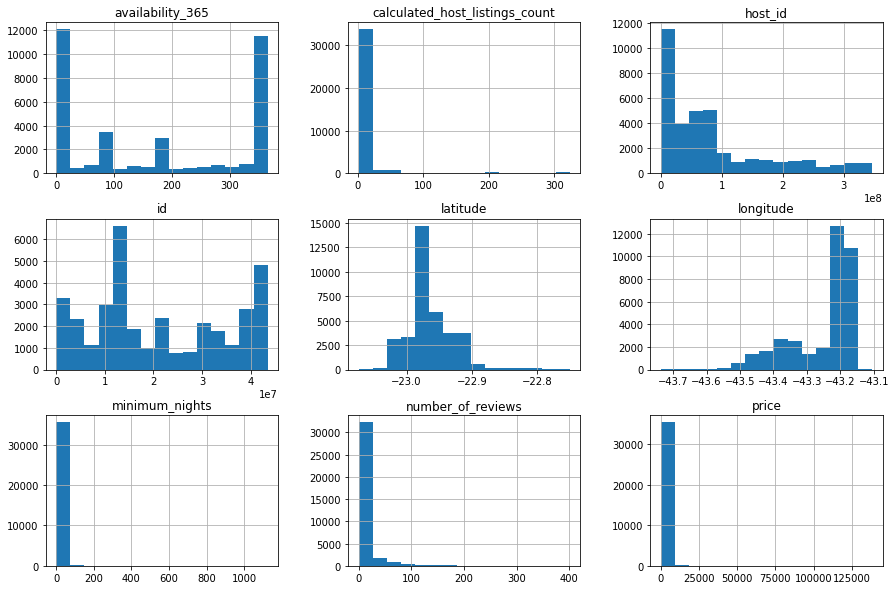

In [100]:
# Plotando histogramas das variáveis numéricas
df.hist(bins = 15, figsize  = (15, 10));

In [101]:
# Ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,35793.000000,35793.000000,35793.000000,35793.000000
mean,795.617858,4.797586,9.747576,171.900455
std,2452.937585,21.844137,25.828574,154.647434
min,0.000000,1.000000,0.000000,0.000000
25%,159.000000,1.000000,0.000000,0.000000
50%,299.000000,2.000000,1.000000,160.000000
75%,649.000000,4.000000,6.000000,362.000000
max,138288.000000,1123.000000,401.000000,365.000000


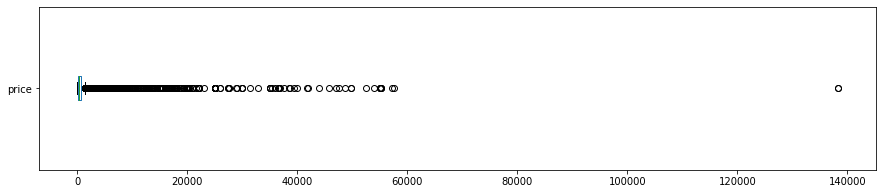

Valores acima de R$ 1500,00:
3415
9.5410%


In [102]:
# Bloxplot para price
df.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# Ver valores acima de 3000
print("Valores acima de R$ 1500,00:\n{}".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]) * 100))

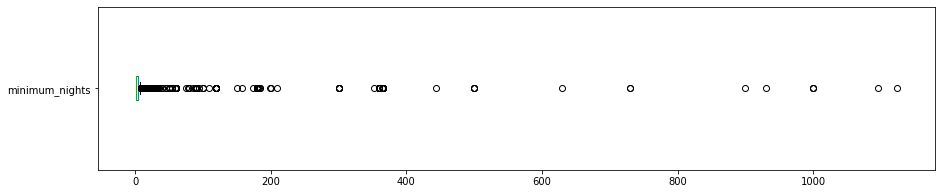

Imóveis com número mínimo de reserva acima de 30 dias:
229
0.6398%


In [103]:
# Boxplot para minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# Ver valores acima de 30
print("Imóveis com número mínimo de reserva acima de 30 dias:\n{}".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))


## Limpeza dos dados

Uma vez identificados os *outliers*, podemos excluí-los para que tenhamos um dataset com menos viés no momento da análise.

Então, com base nos gráficos e informações que vimos acima, excluíremos os imóveis com valor acima de R$ 1500,00 e com reserva mínima acima de 30 dias para reserva.



In [104]:
# Excluindo os outliers criando uma cópia do dataset
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

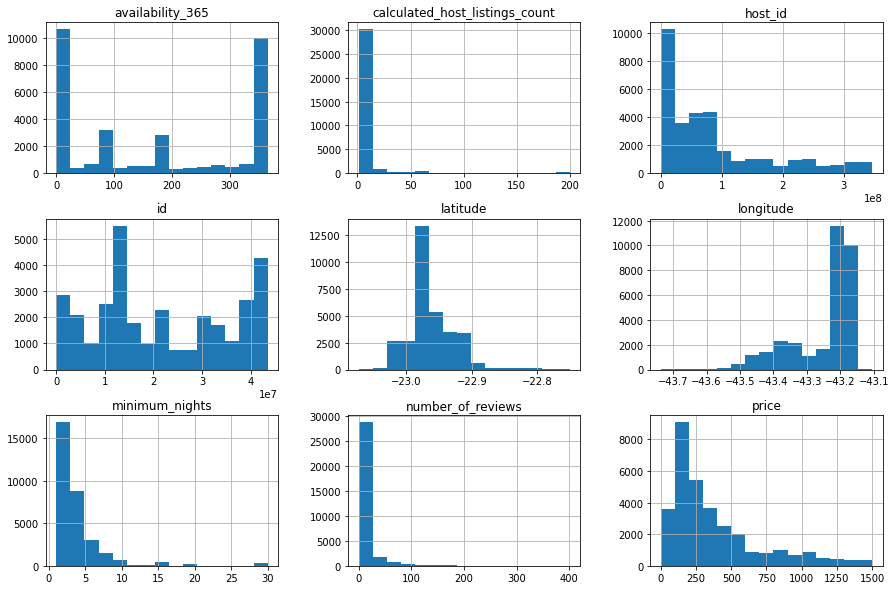

In [105]:
# Plotando histogramas das variáveis numéricas sem outliers
df_clean.hist(bins = 15, figsize=(15, 10));

In [106]:
# Ver resumo estatístico das variáveis numéricas sem outliers
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.217400e+04,3.217400e+04,32174.000000,32174.000000,32174.000000,32174.000000,32174.000000,32174.000000,32174.000000
mean,2.167030e+07,8.642711e+07,-22.964112,-43.249220,377.880804,3.505501,10.662616,5.188537,170.763753
std,1.363408e+07,9.065372e+07,0.034985,0.096035,318.836462,4.147284,26.897794,17.148332,153.120806
min,1.787800e+04,1.173900e+04,-23.072970,-43.737090,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.123247e+07,1.511767e+07,-22.984050,-43.309000,149.000000,1.000000,0.000000,1.000000,0.000000
50%,1.850313e+07,5.663447e+07,-22.969840,-43.196305,260.000000,2.000000,1.000000,1.000000,157.000000
75%,3.469466e+07,1.150963e+08,-22.944182,-43.185950,498.000000,4.000000,7.000000,3.000000,362.000000
max,4.352478e+07,3.468845e+08,-22.750380,-43.104620,1500.000000,30.000000,401.000000,200.000000,365.000000


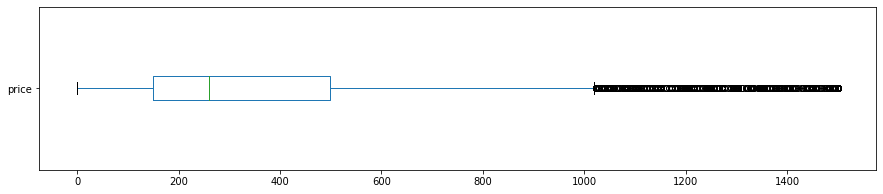

In [107]:
# Boxplot para price sem outliers
df_clean.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

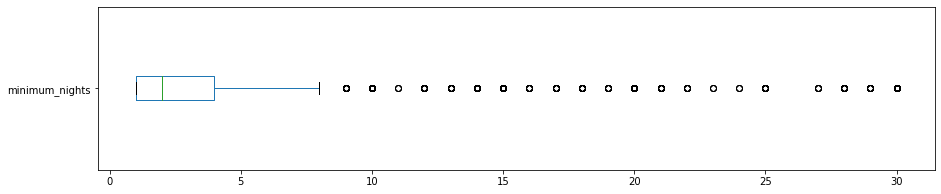

In [108]:
# Boxplot para minimum_nights sem outliers
df_clean.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

## Correlação entre as variáveis

Criando uma mapa de correlação e um *heatmap* podemos ver que não existe uma forte correlação entre nenhumas das variáveis numéricas.

In [109]:
corr = df_clean.corr()

display(corr)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.586476,-0.024949,-0.003120,-0.167133,-0.097352,-0.240970,0.069592,-0.018315
host_id,0.586476,1.000000,0.019660,-0.097342,-0.119051,-0.065343,-0.151604,-0.060145,-0.012624
latitude,-0.024949,0.019660,1.000000,0.342841,-0.173349,-0.045794,-0.065240,-0.072976,-0.004900
longitude,-0.003120,-0.097342,0.342841,1.000000,-0.113663,-0.046937,0.123419,0.082592,-0.034074
price,-0.167133,-0.119051,-0.173349,-0.113663,1.000000,0.150570,-0.161228,0.041941,-0.029684
minimum_nights,-0.097352,-0.065343,-0.045794,-0.046937,0.150570,1.000000,-0.050160,-0.030734,-0.022024
number_of_reviews,-0.240970,-0.151604,-0.065240,0.123419,-0.161228,-0.050160,1.000000,-0.024119,0.049502
calculated_host_listings_count,0.069592,-0.060145,-0.072976,0.082592,0.041941,-0.030734,-0.024119,1.000000,0.075923
availability_365,-0.018315,-0.012624,-0.004900,-0.034074,-0.029684,-0.022024,0.049502,0.075923,1.000000


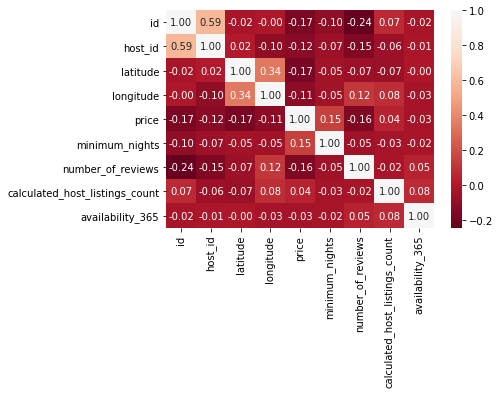

In [110]:
sns.heatmap(corr, cmap = 'RdBu', center = True, annot = True, fmt = '.2f');

## Quais os bairros mais caros?

Vemos que o tipo de imóvel mais disponibilizado para reserva são casas ou apartamentos inteiros. Cerca de 70% do total.

Mas o que realmente chama a atenção é que bairros como Vaz Lobo, Abolição e Caju, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conheça o Rio pode apresentar esses resultados sem se questionar.

Porém, de acordo com o IDH no ano de 2000, Vaz Lobo ocupava a 83ª posição do ranking para os municípios do Rio de Janeiro com um índice de 0,807.
Já o IDH do Leblon, era de 0,967.  O 2º melhor.

Na prática, Vaz Lobo fica muito longe dos principais pontos turísticos da cidade, um bairro mais pobre, com muita influência do tráfico e pouca cobertura policial.
Já o Leblon está muito próximo dos principais pontos da cidade, inclusive os turísticos, é banhado pelo mar possibilitando rápido acesso à praia, e é largamente policiado.

OBS: Toda a cidade do Rio de Janeiro sofre com a violência, porém alguns lugares são mais policiados e recebem mais segurança. Pontos turísticos principalmente.

In [111]:
# Ver qual o tipo de imóvel com maior disponibilidade
df_clean.room_type.value_counts()

Entire home/apt    22363
Private room        8905
Shared room          751
Hotel room           155
Name: room_type, dtype: int64

In [112]:
# Mostrar o percentual de cada tipo de imóvel
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.695064
Private room       0.276776
Shared room        0.023342
Hotel room         0.004818
Name: room_type, dtype: float64

In [113]:
df_clean.groupby(['neighbourhood']).price.describe().sort_values(by = 'mean', ascending = False)[:12]

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Vaz Lobo,3.0,884.333333,533.651884,302.0,651.50,1001.0,1175.50,1350.0
Caju,2.0,660.500000,761.554003,122.0,391.25,660.5,929.75,1199.0
Ricardo de Albuquerque,5.0,610.600000,421.726570,119.0,302.00,553.0,999.00,1080.0
Lagoa,326.0,524.355828,380.696999,49.0,216.50,399.5,801.25,1499.0
Abolição,6.0,494.000000,368.742729,137.0,199.25,399.5,772.25,999.0
Leblon,1393.0,493.765255,328.161955,50.0,249.00,398.0,608.00,1500.0
Alto da Boa Vista,40.0,488.525000,385.637600,33.0,167.00,368.0,724.00,1375.0
Inhoaíba,3.0,480.000000,537.471860,146.0,170.00,194.0,647.00,1100.0
Jacarepaguá,1796.0,477.753898,377.783332,0.0,160.00,348.0,719.25,1499.0


## Analisando a representatividade da amostra

Para termos um exemplo de como uma amostra pode não ser representativa, veja que para Vaz Lobo temos apenas 3 entradas. Já para Leblon temos 1393.

Ou seja, se tivermos uma entrada com dados destoante da realidade em um bairro com poucos imóveis, neste caso são apenas 3, já será o suficiente para realizarmos uma análise deficitária.

Já com 1393 uma entrada com dados destoantes trará um efeito muito menor para a grande massa de dados. O efeito de um dado destoante é diluído pelos outros 1292 dados "normais".

In [114]:
# Ver quantidade de imóveis em Vaz Lobo
print(df_clean.loc[df_clean.neighbourhood == "Vaz Lobo"].head().shape)

# Verificar as 3 entradas para Vaz Lobo
df_clean.loc[df_clean.neighbourhood == "Vaz Lobo"].head()

(3, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2909,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1001,1,0,1,0
15766,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1350,15,0,1,365
33494,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,302,1,0,1,363


In [115]:
# Ver quantidade de imóveis no Leblon
print(df_clean.loc[df_clean.neighbourhood == "Leblon"].shape)

# Verificar as entradas para Leblon
df_clean.loc[df_clean.neighbourhood == "Leblon"]

(1393, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
31,86670,AMAZING VIEW ON THE LEBLON/IPANEMA BOARDER.,474221,June,Leblon,-22.98361,-43.21827,Entire home/apt,138,2,91,7,163
37,89454,Charm with a great location Leblon,487000,Patricia,Leblon,-22.98668,-43.22171,Entire home/apt,487,2,43,3,363
49,99971,Right in front of the beach in Rio!,525976,Ricardo,Leblon,-22.98857,-43.22716,Entire home/apt,242,3,107,1,239
68,137002,Very sophisticated in the mettle of Leblon,635510,Gilberto,Leblon,-22.98346,-43.22032,Entire home/apt,658,3,13,7,298
69,137048,Charming 2 bedroom flat in Leblon,670198,Clarisse,Leblon,-22.98002,-43.22371,Entire home/apt,243,3,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35751,43442810,Suite com acesso a terraço com jacuzzi,9847358,Marcia,Leblon,-22.98114,-43.22494,Private room,110,29,0,2,179
35768,43465334,Leblon Ocean - Flat Vista Mar - 56m2,24690821,Jorge & Tatiana,Leblon,-22.98294,-43.22701,Entire home/apt,365,2,0,2,90
35782,43495124,Leblon casa com vista linda,346884508,Allan,Leblon,-22.97904,-43.22447,Entire home/apt,448,1,0,1,0
35783,43495266,Rio Spot Leblon D049,13580277,Marcio,Leblon,-22.98454,-43.21892,Entire home/apt,332,1,0,65,365


## Localização dos imóveis pela longitude e latitude

Como temos os pontos de longitude e latitude de cada imóvel, podemos plotar um scatter plot mostrando a localização de cada imóvel em relação ao seu preço.

É possível perceber que a maioria dos imóveis estão concentrados mais próximo ao litoral e pontos turísticos (zona sul e central da cidade) e os preços mais praticados estão abaixo de R$ 800,00.

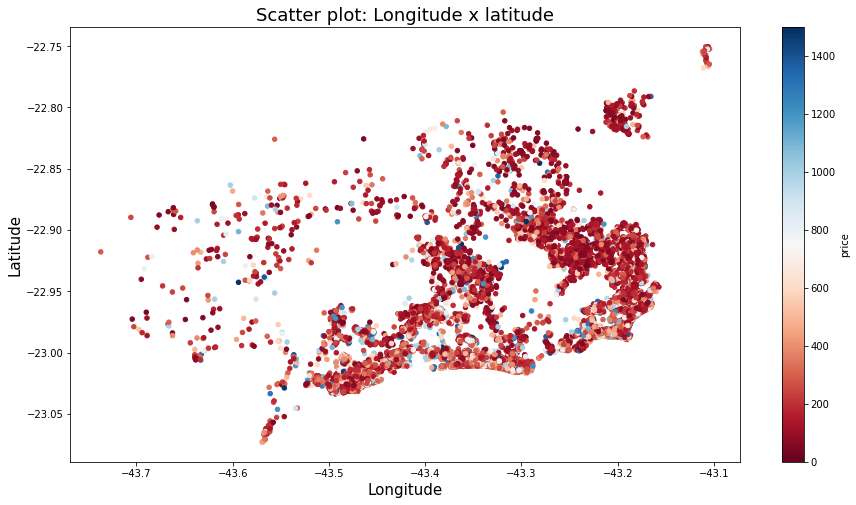

In [116]:
# Plotando um Scatter plot pela longitude e latitude dos imóveis
fig, ax = plt.subplots()

df_clean.plot.scatter(x = 'longitude', y = 'latitude', c = 'price', ax = ax, s = 20, figsize = (15, 8), alpha = 1, cmap=plt.get_cmap('RdBu'))
ax.set_title('Scatter plot: Longitude x latitude', size = 18)
ax.set_xlabel('Longitude', size = 15)
ax.set_ylabel('Latitude', size = 15);

plt.show()


## Analisando os anúncios de imóveis em Vaz Lobo

Ao verificar os dados para os imóveis em Vaz Lobo, cria-se uma curiosidade em conhecer os anúncios na plataforma.

É possível acessar um arquivo no mesmo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), com mais dados do que o acessado para a análise exploratória feita até aqui.

Neste novo dataset (listings.csv.gz) conseguimos visualizar o link para o anúncio em específico e analisar de forma direta o imóvel em Vaz Lobo.

In [117]:
# Instalar WordCloud
!pip install wordcloud -q

# Importar os pacotes necessários
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [118]:
# Importar dados
df_full = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
# Acessar os imóveis em Vaz Lobo
df_full.loc[df.neighbourhood == "Vaz Lobo"].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2909,2768499,https://www.airbnb.com/rooms/2768499,20200524171540,2020-05-25,Próximo ao Maracanã,Está localizado à 40 minutos do estádio Maracanã.,O transporte público é bem eficiente em frente...,Está localizado à 40 minutos do estádio Maraca...,none,NaN,NaN,NaN,NaN,Eu falo Inglês fluente.,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/36017620/c...,NaN,14157867,https://www.airbnb.com/users/show/14157867,Fernando,2014-04-11,"Rio, Rio de Janeiro, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/14157867/prof...,https://a0.muscache.com/im/users/14157867/prof...,NaN,1.0,1.0,['phone'],t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Vaz Lobo,Vaz Lobo,...,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,74 months ago,t,0,0,0,0,2020-05-25,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
15766,14221134,https://www.airbnb.com/rooms/14221134,20200524171540,2020-05-27,"casa colonial 3 quartos, garagem",casa em estilo colonial possui sala com 2 ambi...,NaN,casa em estilo colonial possui sala com 2 ambi...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/fc53e94d-f...,NaN,86402266,https://www.airbnb.com/users/show/86402266,Lucia,2016-07-27,BR,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/0868e...,https://a0.muscache.com/im/pictures/user/0868e...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Vaz Lobo, Rio de Janeiro, Brazil",Vaz Lobo,Vaz Lobo,...,$0.00,15,30,15,15,30,30,15.0,30.0,47 months ago,t,30,60,90,365,2020-05-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,NaN
33494,42012781,https://www.airbnb.com/rooms/42012781,20200524171540,2020-05-27,Casas flegler,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/1765f7f2-9...,NaN,332881900,https://www.airbnb.com/users/show/332881900,Igor Flegler De Souza,2020-02-02,"Paraty, State of Rio de Janeiro, Brazil",rua larci Raimundo 203,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aaac...,https://a0.muscache.com/im/pictures/user/7aaac...,NaN,1.0,1.0,['phone'],t,f,"Váz Lobo, Rio de Janeiro, Brazil",Vaz Lobo,Vaz Lobo,...,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,4 months ago,t,28,58,88,363,2020-05-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,1,0,1,0,NaN


Ao acessar os 3 links é possível verificar que:

- No primeiro há apenas 1 foto que é a do próprio anfitrião do imóvel. Além disso, a descrição diz o transporte público é bem eficiente e o imóvel fica à 40 minutos do estádio Maracanã;
> Sobre esta descrição, é importante analisar que de fato Vaz Lobo fica, em média, 40 minutos distante do estádio Maracanã, porém usando o **trem**. Então devemos entender o contexto deste específico tipo de transporte na cidade: Os bairros por onde ele passa é perigoso? Lembrando que o Rio de Janeiro possui constantes tiroteios em comunidades dominadas pelo tráfico. Ele cobre toda a cidade ou os locais que irei visitar? Ele possui vagões regularmente em todas as linhas? Qual o horário que ele opera durante a semana e finais de semana?



- O segundo possui fotos de um imóvel normalmente;
> Como esperado.

- O terceiro, após fotos de um imóvel, mostra fotos de praia.
> Sobre o terceiro imóvel, as fotos da praia supõem a existência de uma próxima ao imóvel. Porém, a mais praia mais próxima de Vaz Lobo é a Praia de Copabana, 1h30min distante de Vaz Lobo e com características totalmente diferentes das apresentadas na foto. Deduzo então que as fotos do imóvel não são de um imóvel em Vaz Lobo, ou ainda que, o imóvel fica em Vaz Lobo e as fotos da praia foram incluídas ali por algum outro motivo desconhecido.



Esta pesquisa complementar corrobora com a tese de que é muito importante verificar a representatividade dos dados acessados. O fato de termos dados não significa que estes representam a verdade absoluta.

É indispensável buscar **conhecimento** sobre o que se está analisando além de **senso crítico**.

## Plotando uma wordcloud

Uma vez que este novo arquivo foi acessado, podemos usar a coluna `summary` para ver a descrição do imóvel.

Com esta descrição iremos gerar uma wordcloud com a imagem do Cristo Redentor, uma das sete maravilhas do mundo moderno e principal ponto turístico do Rio de Janeiro, com as palavras mais utilizadas nas descrições dos imóveis.

Vamos verificar e excluir as linhas com dados ausentes na coluna `summary` já que não nos ajudará com a criação da wordcloud.

In [120]:
# Ver a quantidade de valores ausentes
print("Quantidade de valores ausentes: ", df_full.summary.isnull().sum())

Quantidade de valores ausentes:  2577


Excluir as linhas já atribuindo a uma outra variável.

In [121]:
# Excluir valores ausentes
summary = df_full.dropna(subset=['summary'], axis = 0)['summary']

Para criar a wordcloud, vou concatenar as *strings*, fazendo com que sejam apenas uma linha.

In [122]:
# Concatenar strings
all_summary = " ".join(s for s in summary)

print("Quantidade de palavras: {}".format(len(all_summary)))

Quantidade de palavras: 10003725


Iremos usar estes dados para criar nossa wordcloud removendo preposições e palavras que não irão agregar.

Além disso, usaremos uma imagem para deixar a wordcloud ainda mais carioca.

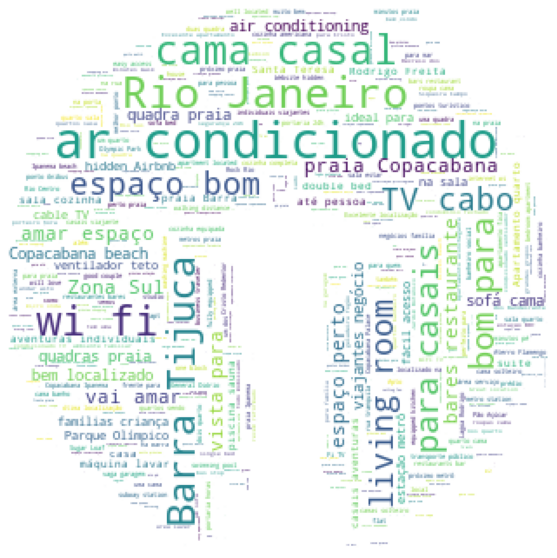

In [133]:
# Endereço da imagem
rio_mask = np.array(Image.open("/content/rio_mask.jpg"))

# Lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "por", "causa", "etc"])

# Gerar wordcloud
wordcloud = WordCloud(stopwords = stopwords, background_color = "white", width=1000, height=1000, max_words=2000, mask = rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# Mostrar a imagem
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_rj_wordcloud.png");

## Conclusão

Nesta análise pudemos verificar que o Rio de Janeiro possui 155 bairros com oferta de imóveis que estão nos mais diversos bairros, apesar de haver uma concentração maior na Zona Sul e Centro da cidade.
Nesta análise, chama atenção a necessidade de conciliarmos a análise dos dados com uma pesquisa complementar.
Como visto, temos imóveis no bairro Vaz Lobo com preços mais elevados do que bairros como Leblon, área nobre da cidade com uma das melhores qualidades de vida. Isso nos levou a analisar a representatividade dos dados e perceber que:
- Dados com pouca representatividade pode nos levar a uma análise deficitária e até errônea do cenário;
- Dados podem conter algum tipo de viés próprio que deve ser investigado antes de chegarmos a alguma conclusão sobre a massa de dados analisada.

Soma-se à isso, a necessidade de sempre realizarmos uma pesquisa complementar. Uma rápida busca na internet, por exemplo, nos mostra que Vaz Lobo fica muito longe dos principais pontos da cidade e em um local com maior possibilidade de ocorrência de violência do que outros bairros.

Importante lembrar que não existe bairro 100% seguro na cidade do Rio de Janeiro. Apenas uma probabilidade maior ou menor de ocorrências criminais.

Esta não foi uma análise profunda, mas já foi possível perceber a existência de outliers e a necessidade de trabalhá-los para chegarmos a informações mais confiáveis. Além disso, percebemos que a existência de poucos dados, ou não representativos, podem distorcer as informações estatísticas.
